# Курсовая работа. Блок ML Beginner


[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [63]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
%matplotlib inline


warnings.filterwarnings('ignore')
telecom_users_df = pd.read_csv('telecom_users.csv')
telecom_users_df.drop('customerID', axis=1, inplace=True)#не пригодится в построении модели
telecom_users_df.head(5)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


<AxesSubplot:>

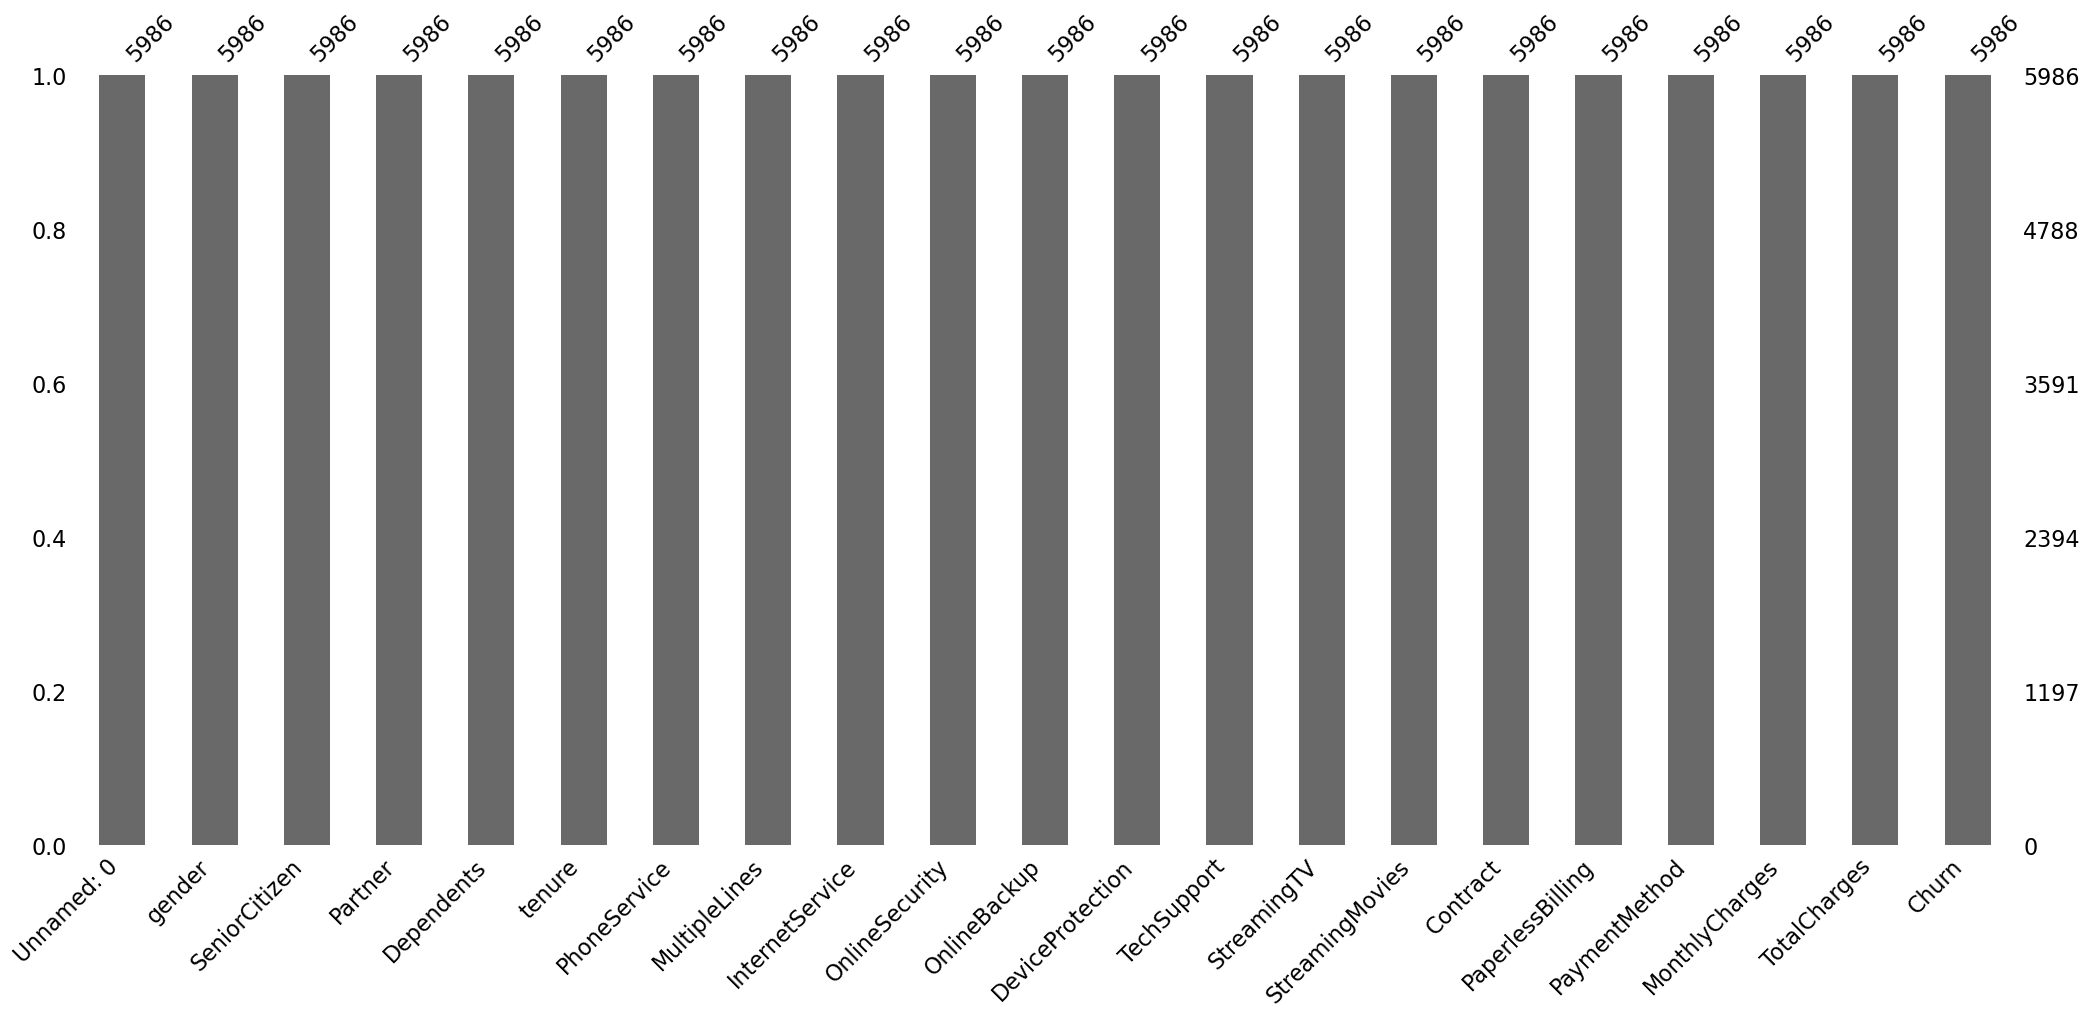

In [64]:
msno.bar(telecom_users_df) #проверка пропущенных значений

In [65]:
telecom_users_df.dtypes

Unnamed: 0            int64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [66]:
# когда делал describe по  столбцам object увидел, что встречается значение ' ', клиент пользуется сервисом 1й месяц и еще не платил.
telecom_users_df['TotalCharges'][telecom_users_df['TotalCharges'] == ' '] = 0 
telecom_users_df['TotalCharges'] = pd.to_numeric(telecom_users_df['TotalCharges'])

In [67]:
telecom_users_df.describe(include=[np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2294.221559
std,2035.705666,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,1777.250000,0.000000,9.000000,35.650000,401.587500
50%,3546.500000,0.000000,29.000000,70.400000,1408.575000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [68]:
telecom_users_df.describe(include=[np.object])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


0.2651186100902105


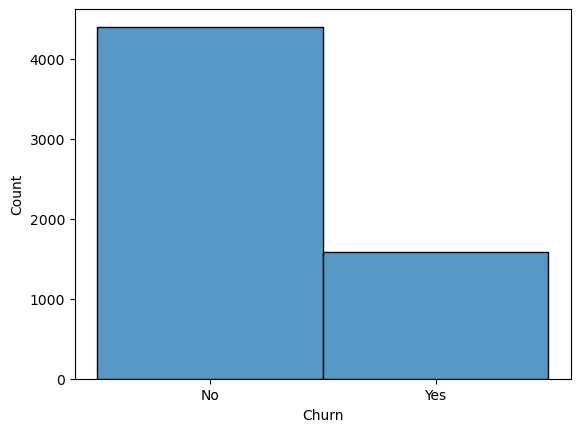

In [69]:
sns.histplot(telecom_users_df['Churn'])
print(telecom_users_df[telecom_users_df['Churn'] == 'Yes'].shape[0] /telecom_users_df['Churn'].shape[0])
#26% - отток пользователей

In [70]:
#Чтобы повеить корреляцию фич, нужно object столбцы преобразовать в столбцы чисел.
for column in telecom_users_df.columns:
    if telecom_users_df[column].dtype == 'O':
        telecom_users_df[column].replace(['Yes', 'No'], [1, 0], inplace=True)
        for iteration, value in enumerate(list(telecom_users_df[column].unique())):  
            if type(value) == str:         
                if telecom_users_df[column].nunique() > 2:  
                    iteration += 1                     
                    telecom_users_df[column].replace(value, iteration, inplace=True)
telecom_users_df.TechSupport

0       1
1       0
2       0
3       0
4       0
       ..
5981    0
5982    1
5983    1
5984    0
5985    1
Name: TechSupport, Length: 5986, dtype: int64

# 2. Исследование зависимостей и формулирование гипотез

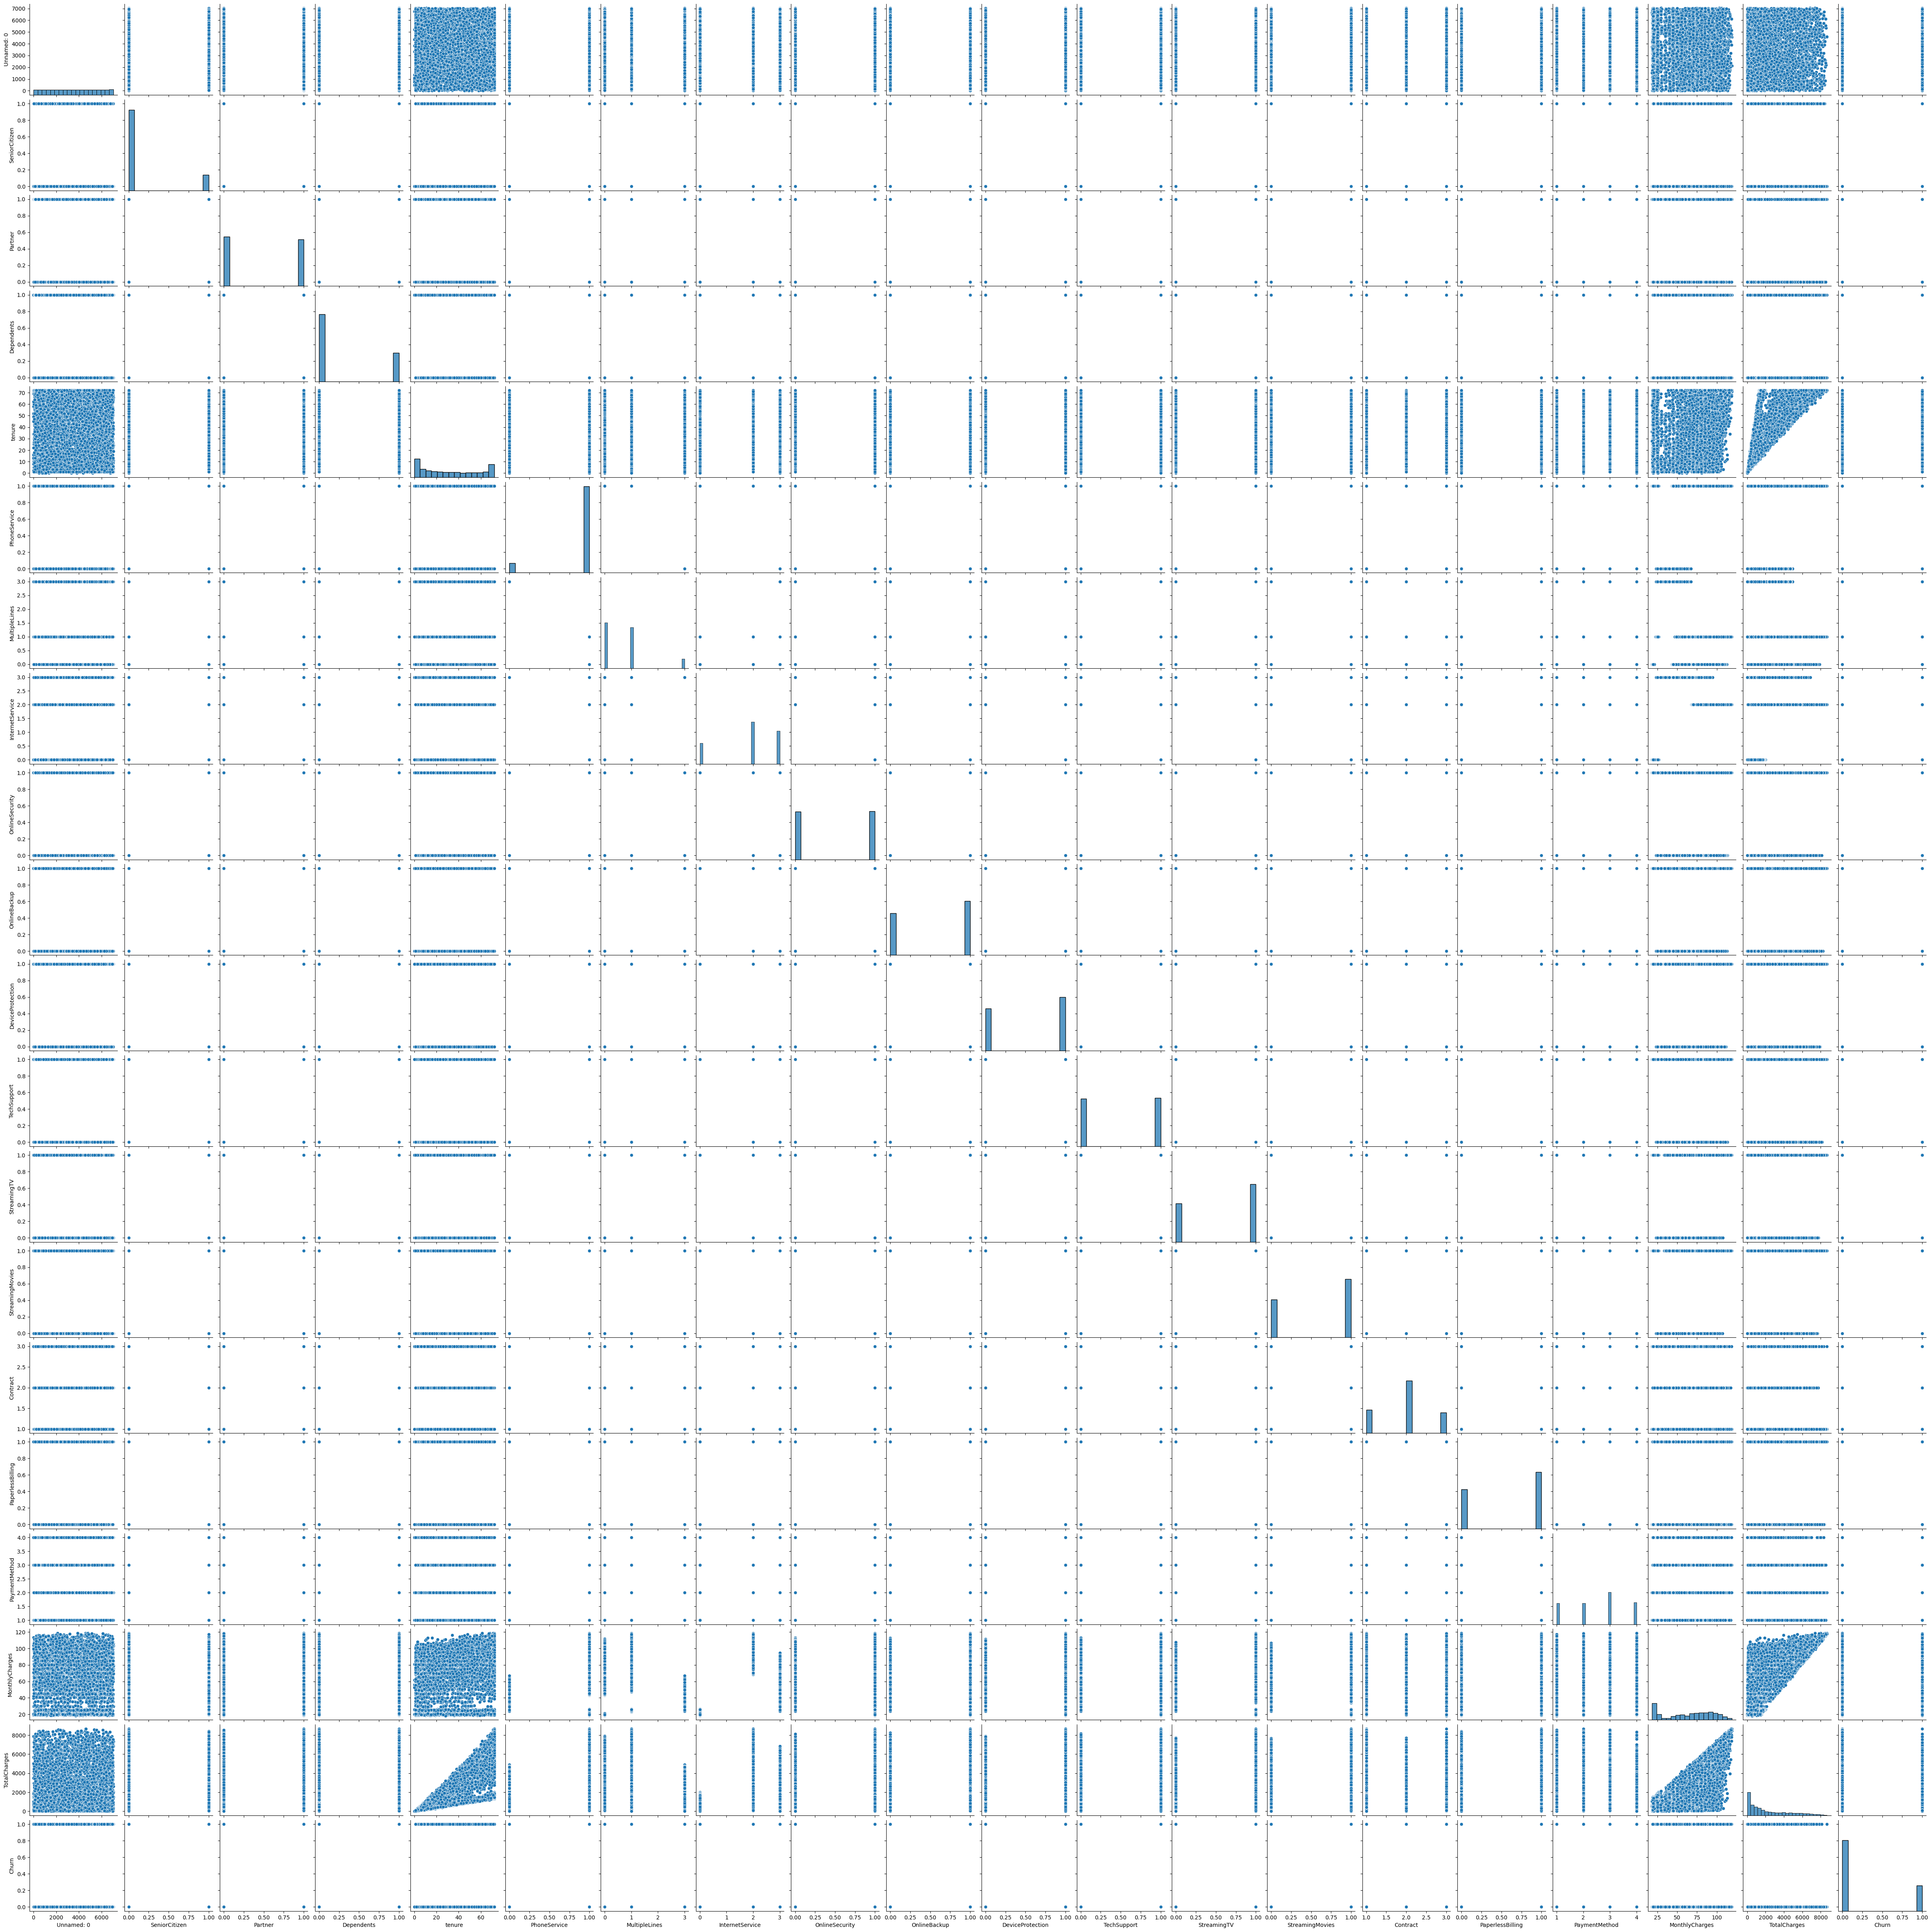

In [71]:
sns.pairplot(data=telecom_users_df)

<AxesSubplot:>

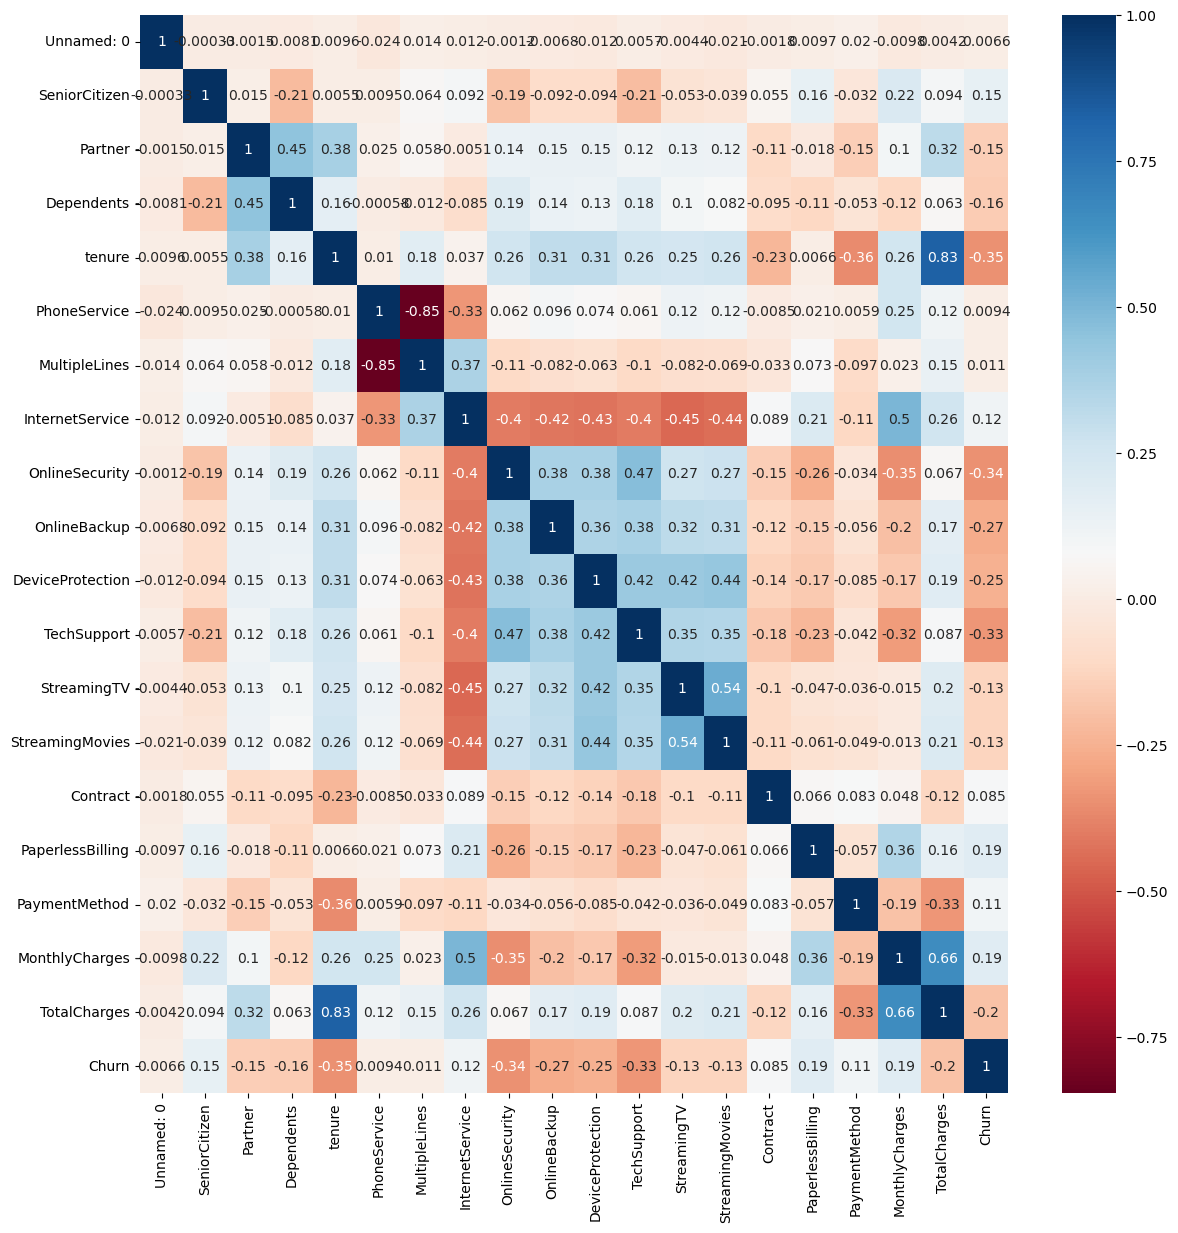

In [72]:
plt.figure(figsize=(14,14))
sns.heatmap(data=telecom_users_df.corr(), annot=True, cmap='RdBu')

tenure
0       0
1     318
2     104
3      82
4      73
     ... 
68      8
69      6
70     10
71      5
72      4
Name: Churn, Length: 73, dtype: int64

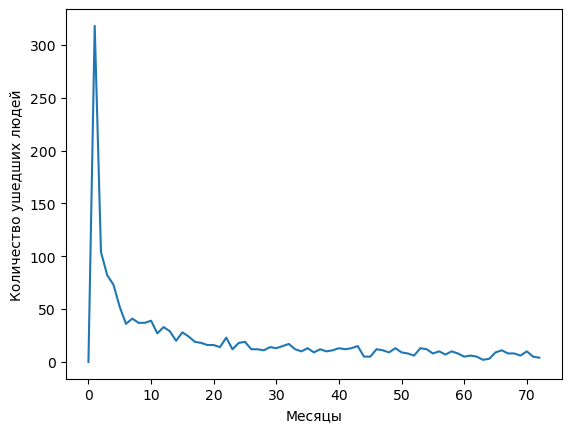

In [117]:
churn_per_month = telecom_users_df.groupby('tenure')['Churn'].agg(np.sum)
lineplot = sns.lineplot(x=churn_per_month.index, y = churn_per_month)
lineplot.set_ylabel('Количество ушедших людей')
lineplot.set_xlabel('Месяцы')
churn_per_month

In [120]:
churn_per_month[0:13].sum() / churn_per_month.sum()

0.553875236294896

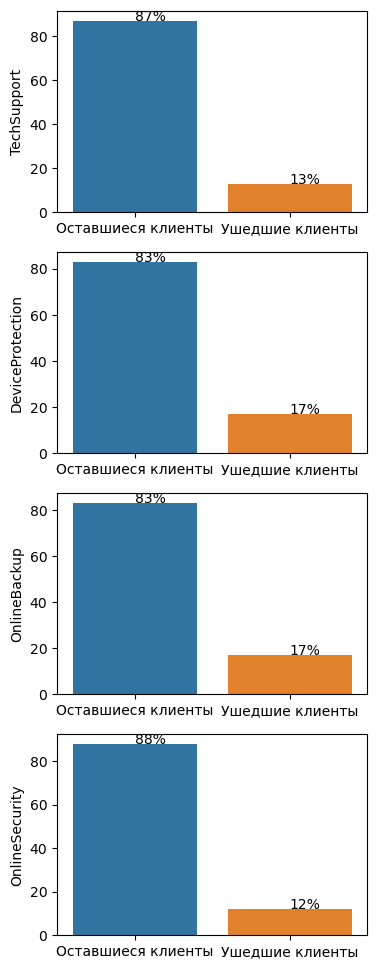

In [74]:
keys = ['TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity']
churn_option = []
ax = 0
fig, axs = plt.subplots(4, 1, figsize = (4, 12))
i_axs = 0
for key in keys:
    churn_option = telecom_users_df[telecom_users_df[key] == 1].groupby('Churn')[key].agg(pd.Series.count)
    stay_proc = int(churn_option[0] / (churn_option[0] + churn_option[1]) * 100)
    left_proc = 100 - stay_proc
    plots = sns.barplot(x=['Оставшиеся клиенты', 'Ушедшие клиенты'], y = [stay_proc, left_proc], ax=axs[i_axs])
    bar1 = plots.patches[0]
    bar2 = plots.patches[1]
    axs[i_axs].annotate(str(stay_proc) + '%', xy=(bar1.get_x() + bar1.get_width()/2, bar1.get_height()))
    axs[i_axs].annotate(str(left_proc) + '%', xy=(bar2.get_x() + bar2.get_width()/2, bar2.get_height()))
    axs[i_axs].set_ylabel(key)
    i_axs +=1

# 3. Построение моделей для прогнозирования оттока

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler


y = telecom_users_df['Churn']
scaler = MinMaxScaler()
#Маштабируем данные
x = scaler.fit_transform(telecom_users_df[['TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'tenure']])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()

skf = StratifiedKFold(n_splits=7, random_state=17, shuffle=True)#а как понять оптимальное n_splits ?

In [76]:
knn_params = {'n_neighbors': (1, 50, 1)} #как диапазон для n_neighbors и шаг подобрать правильно?
gs_knn = GridSearchCV(estimator=knn, param_grid=knn_params, cv=skf)
knn_model = gs_knn.fit(x_train, y_train)

In [83]:
gbc_params = {'learning_rate': (0.1, 1, 0.1)} 
gs_gbc = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf)
gbc_model = gs_gbc.fit(x_train, y_train)

In [82]:
rfc_params = {'n_estimators': (10, 200, 10)} 
gs_rfc = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=skf)
rfc_model = gs_rfc.fit(x_train, y_train)

In [79]:
lr_params = {'C': (0.1, 1, 0.1)} 
gs_lr = GridSearchCV(estimator=lr, param_grid=lr_params, cv=skf)
lr_model = gs_lr.fit(x_train, y_train)

# 4. Сравнение качества моделей 

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [85]:
knn_pred = knn_model.predict(x_test)
gbc_pred = gbc_model.predict(x_test)
rfc_pred = rfc_model.predict(x_test)
lr_pred = lr_model.predict(x_test)

In [101]:
#доля правильных предсказаний
print('KNN accuracy:', accuracy_score(knn_pred, y_test))
print('gbc accuracy:', accuracy_score(gbc_pred, y_test))
print('rfc accuracy:', accuracy_score(rfc_pred, y_test))
print('lr accuracy:', accuracy_score(lr_pred, y_test))

KNN accuracy: 0.7904841402337228
gbc accuracy: 0.7771285475792988
rfc accuracy: 0.7445742904841403
lr accuracy: 0.7796327212020033


In [102]:
#точность
print('KNN precision score:', precision_score(knn_pred, y_test))
print('gbc precision scor:', precision_score(gbc_pred, y_test))
print('rfc precision scor:', precision_score(rfc_pred, y_test))
print('lr precision scor:', precision_score(lr_pred, y_test))

KNN precision score: 0.37777777777777777
gbc precision scor: 0.3968253968253968
rfc precision scor: 0.48253968253968255
lr precision scor: 0.45714285714285713


In [103]:
#полнота
print('KNN recall_score:', recall_score(knn_pred, y_test))
print('gbc recall_score:', recall_score(gbc_pred, y_test))
print('rfc recall_score:', recall_score(rfc_pred, y_test))
print('lr recall_score:', recall_score(lr_pred, y_test))

KNN recall_score: 0.6839080459770115
gbc recall_score: 0.6188118811881188
rfc recall_score: 0.5152542372881356
lr recall_score: 0.6075949367088608


In [106]:
print('KNN roc auc score:', roc_auc_score(knn_pred, y_test))
print('gbc roc auc score:', roc_auc_score(gbc_pred, y_test))
print('rfc roc auc score:', roc_auc_score(rfc_pred, y_test))
print('lr roc auc score:', roc_auc_score(lr_pred, y_test))

KNN roc auc score: 0.7462508979885057
gbc roc auc score: 0.7140244144896417
rfc roc auc score: 0.6673724121102914
lr roc auc score: 0.7148276452534938


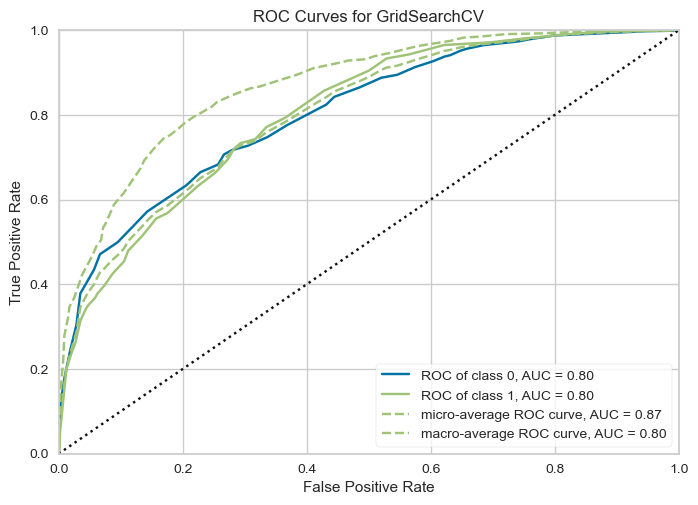

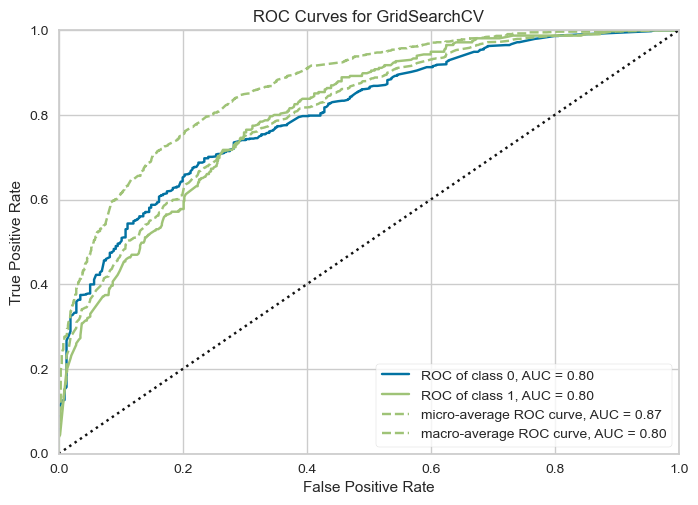

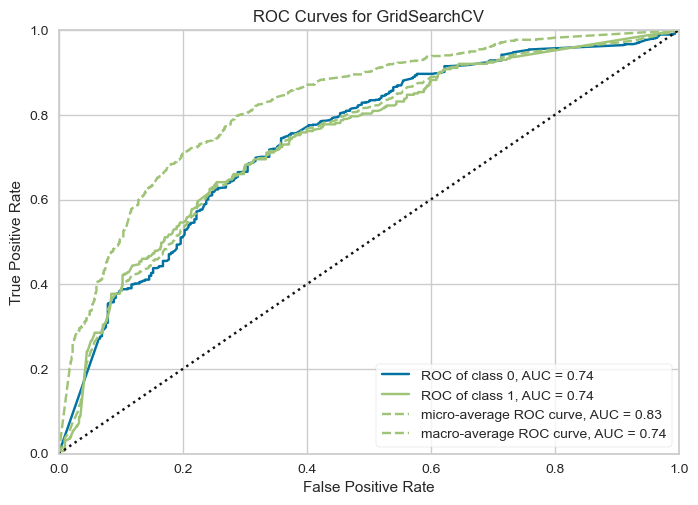

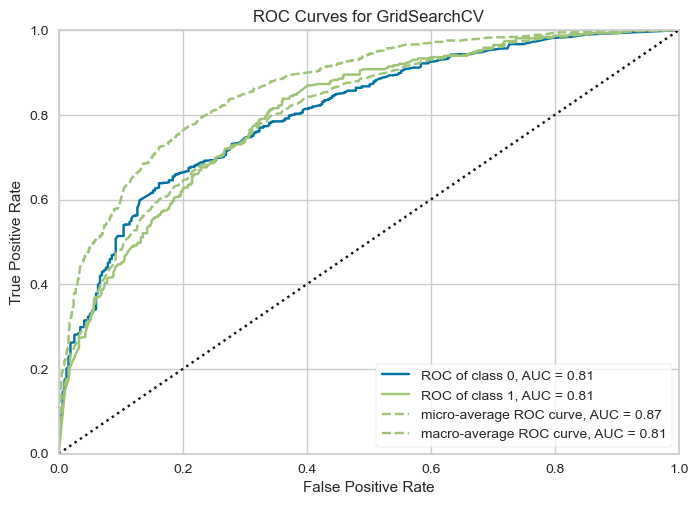

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [125]:
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(knn_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)      
visualizer.show()

visualizer = ROCAUC(gbc_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)      
visualizer.show()

visualizer = ROCAUC(rfc_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)      
visualizer.show()

visualizer = ROCAUC(lr_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)      
visualizer.show()

In [ ]:
Полнота в данной задаче важнее точности, лучшая полнота у knn, так у этой модели лучший auc roc и accuracy/